In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
#from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
provider0 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backends = provider0.backends()
backend = provider0.get_backend('ibmqx4')
#backend = provider0.get_backend('ibmq_16_melbourne')

print("The backend is " + backend.name())

The backend is ibmqx4


In [3]:
simulator = Aer.get_backend('qasm_simulator')

In [4]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q,c)

#state preparation
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.x(q[3])
qc.h(q[3])

#1st Grover iteration
qc.ccx(q[0],q[1],q[4])
qc.ccx(q[4],q[2],q[3])
qc.ccx(q[0],q[1],q[4])

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.h(q[2])
qc.ccx(q[0],q[1],q[2])
qc.h(q[2])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

#2nd Grover iteration
qc.ccx(q[0],q[1],q[4])
qc.ccx(q[4],q[2],q[3])
qc.ccx(q[0],q[1],q[4])

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.h(q[2])
qc.ccx(q[0],q[1],q[2])
qc.h(q[2])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

#Measure
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])


qc.h(q[0])
qc.h(q[1])
qc.x(q[0])
qc.x(q[1])
qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.x(q[0])
qc.x(q[1])
qc.h(q[0])
qc.h(q[1])

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

# IBMQx4

In [5]:
job_exp = execute(qc, backend=backend, shots=8192)
counts = job_exp.result().get_counts(qc)

In [6]:
print(counts)

{'00111': 950, '00000': 1107, '00010': 1115, '00100': 945, '00110': 901, '00001': 1129, '00101': 948, '00011': 1097}


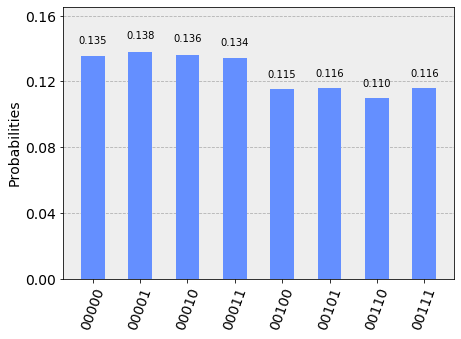

In [7]:
plot_histogram(counts)

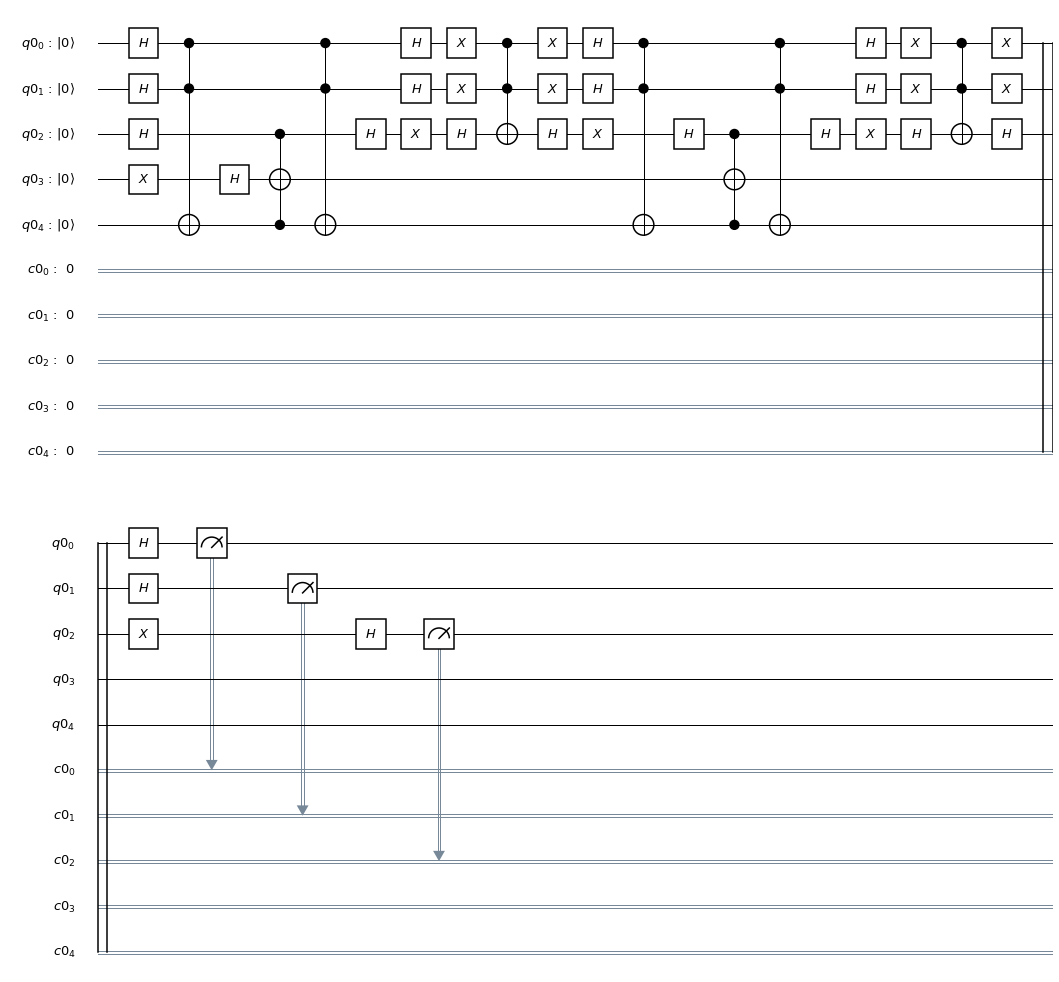

In [8]:
qc.draw(output='mpl')

# Simulator

In [9]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [10]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'00111': 7725, '00000': 67, '00010': 62, '00100': 75, '00110': 59, '00001': 64, '00101': 60, '00011': 80}


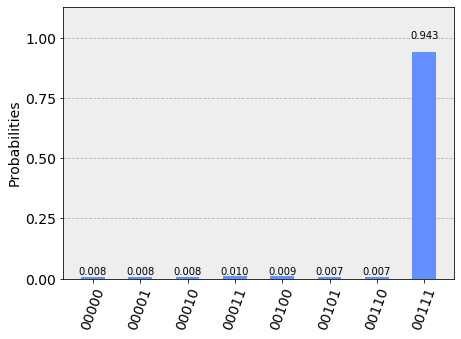

In [11]:
plot_histogram(counts_sim)